# Understanding Logistic Regression by Reverse Engineering Data

In this project, we simulate the data suitable for Logistic Regression model. Then, we fit the Logistic Regression model on the simulated data and evaluate the model and also draw meaningful insights where neccessary.

A Logistic Regression model can be fitted to the data when the dependent variable is:
1. Binary
2. Proportions

Firstly, we start with the Logistic model with binary dependent variable and then head to the Logistic model with proportions dependent variable.

## Logistic Regression Model with Binary Dependent Variable 

### Simulating Data Suitable for Logistic Regression Model with Binary Dependent Variable

Considering 2 independent variables in the model, the true values of the parameters be as follows:$$\beta_{0}=2.5, \beta_{1}=1,\beta_{2}=-0.5$$

Simulate the dependent factor variable with possible outcomes 0 and 1 from Binomial distribution with sample size of 150 and Prob(y=1)=0.63. Let “m” be the number of y=1 outcomes observed.

In [1]:
library(stats)
y = rbinom(n = 150,size = 1,prob = 0.63)
y = factor(y)
summary(y)

0  1 
51 99

Logistic regression models the probability of y=1 and the model predicts y=1 if $\hat{P}(y=1|x_{1},x_{2})>0.5$ and predicts y=0 if $\hat{P}(y=1|x_{1},x_{2})<0.5$ and hence $\hat{P}(y=1|x_{1},x_{2})=0.5$ is known as decision boundary.

Since there are m number of y=1 outcomes, m number of observations have to be simulated satisfying $[\hat{P}(y=1|x_{1},x_{2})]_{\hat{\beta}=\beta}>0.5$ (We use $\hat{\beta}=\beta$ so as to simulate data from the logistic model considered) i.e., $$\Bigg[\frac{1}{1+e^{-X_{m\times3}\hat{\beta}_{3\times1}}}\Bigg]_{\hat{\beta}=\beta}>[0.5]_{m\times1}\implies X\beta>0$$($\because$ The Logistic regression model equation is $ln(\frac{P}{1-P})=X\beta\implies P(y=1|X)=\frac{1}{1+e^{-X\beta}}$)

i.e., m number of observations ($x_{1},x_{2}$) has to be simulated from the constraint $2.5+x_{1}-0.5x_{2}>0$


In [2]:
x1 = c()
x2 = c()
repeat{
  for(i in 1:summary(y)[2]){
    u1 = runif(1,0,5)
    u2 = runif(1,0,15) 
    if(u1-0.5*u2+2.5>0){
      x1[i] = u1
      x2[i] = u2
    }
  }
  if(length(na.omit(x1))==summary(y)[2]){break}
} 

Similarly, 150 - m number of observations ($x_{1},x_{2}$) has to be simulated from the constraint $2.5+x_{1}−0.5x_{2}<0$ corresponding to the y=0 outcomes.

In [3]:
repeat{
  for(i in (summary(y)[2]+1):150){
    u1 = runif(1,0,5)
    u2 = runif(1,0,15) 
    if(u1-0.5*u2+2.5<0){
      x1[i] = u1
      x2[i] = u2
    }
  }
  if(length(na.omit(x1))==150){break}
}

The simulated variables should be put together into a dataframe such that, the data simulated from the 1st constraint has to be associated with y=1 outcomes and the data simulated from 2nd constraint has to be associated with y=0 outcomes. 

In [4]:
y = sort(y,decreasing = TRUE)
df = data.frame(y,x1,x2)
head(df)

y,x1,x2
1,1.2420594,7.354441
1,3.1622362,3.329191
1,2.2060306,5.170763
1,4.6169975,11.441084
1,3.0917430,6.481433
1,0.5882043,3.778552


This completes the process of data simulation.

### Model Fitting and  Evaluation on Simulated Data 

Splitting the simulated data into training and test sets and fitting Logistic regression model on training set:

In [5]:
library(caTools)
split = sample.split(df$y, SplitRatio = 0.80)
training_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)
model1 = glm(y ~ ., family = binomial(link = "logit"), data = training_set,control = list(maxit = 50))

Warning message:
"package 'caTools' was built under R version 3.6.3"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [6]:
paste("The estimated parameters are", model1$coefficients[1],model1$coefficients[2],model1$coefficients[3])

[1] "The estimated parameters are 428.16910438626 164.156418103325 -82.5037065581054"

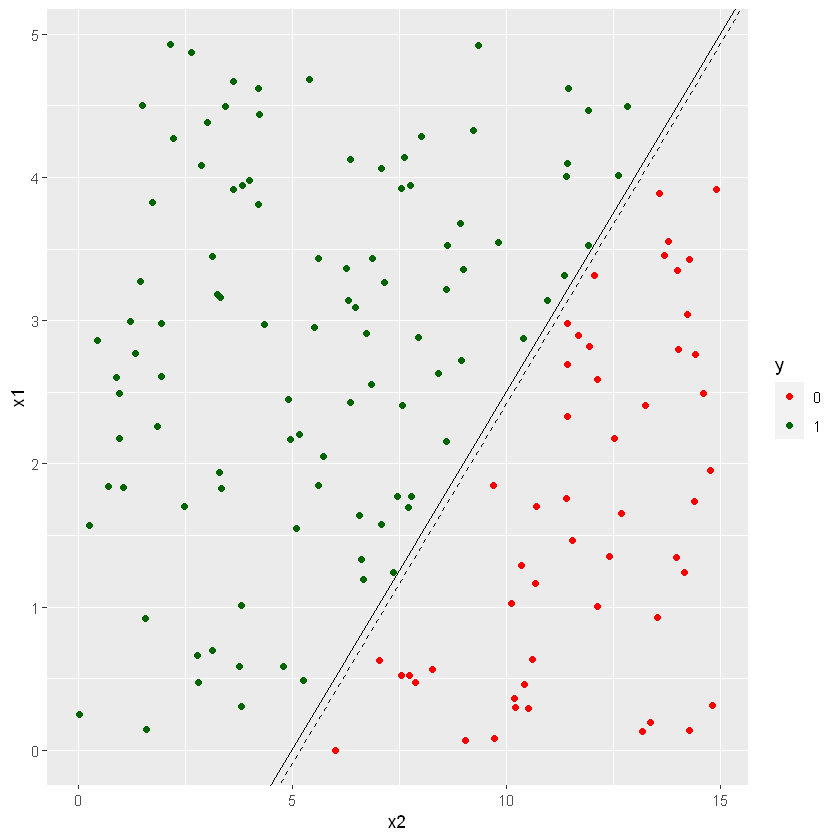

In [7]:
#install.packages("ggplot2")
library(ggplot2)
ggplot(df, aes(x=x2, y=x1, group=y)) +
  geom_point(aes(color=y)) +
  scale_color_manual(values=c('red','darkgreen')) +
  geom_abline(intercept = -2.5, slope = 0.5)+
  geom_abline(intercept = -model1$coefficients[1]/model1$coefficients[2],
              slope = -model1$coefficients[3]/model1$coefficients[2],
              linetype = "dashed")

The estimated decision boundary is (Dotted line):$$428.169+164.156x_{1}-82.504x_{2}=0\implies 2.608+x_{1}-0.503x_{2}=0$$

Whereas the actual boundary line is (Solid line):$$2.5+x_{1}-0.5x_{2}=0$$

It can be observed that $\hat{\beta}\ne\beta$ but the ratios are approximately equal i.e., the estimated decision boundary is almost same as the actual decision boundary. This is because, higher the segregation in binary dependent variable explained by the independent variables, more inflated the estimated parameters are, and results in more extreme $\hat{P}(y=1|x_{1},x_{2})$ i.e., closer to 0 or 1.

Since the y variable is binary and the objective is to classify the observations between y=0 and y=1, the model performance depends on the decision boundary. So, even though the estimated and actual parameters are not equal, the fitted model would be highly accurate, as the decision boundaries are almost similar.

A Confusion matrix can be used for evaluating the performance of a classification model. The matrix compares the actual target values to the predicted and gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.




In [8]:
#install.packages("MLmetrics")
library(MLmetrics)
ypred = ifelse(predict(model1,test_set) > 0.5, 1, 0)
ConfusionMatrix(ypred,test_set$y)

Warning message:
"package 'MLmetrics' was built under R version 3.6.3"
Attaching package: 'MLmetrics'

The following object is masked from 'package:base':

    Recall



      y_pred
y_true  0  1
     0 10  0
     1  0 20

There aren't any false positive(Type 1 error) or false negative(Type 2 error) predictions which implies that the model has a perfect 100% accuracy.

Both Precision($\frac{TP}{TP+FN}$) and Recall($\frac{TP}{TP+FP}$) of the model are equal to 1 as FP=FN=0.

F1 Score, the evaluation metric of predictive power of the model is the Harmonic mean of Precision and Recall. Therefore, the F1 Score of the model is a perfect score 1.

This concludes that the predictive performance of classification model explicitly depends upon the decision boundaries.

## Logistic Regression Model with Proportions as Dependent Variable 

### Simulating Data Suitable for Logistic Regression Model with Proportions as Dependent Variable

Considering 2 independent variables in the model, the true values of the parameters be as follows:$$\beta_{0}=-5, \beta_{1}=2.4,\beta_{2}=1.5$$

Simulate the dependent variable proportions from Uniform distribution with sample size of 200 and lower, upper limits as 0, 1 respectively. 

In [9]:
p = runif(200)

The independent variables can be simulated directly from the Logistic regression model equation $ln(\frac{P}{1-P})=X\beta$

In [10]:
x1 = c()
x2 = c()
for(i in 1:200){
    x1[i] = runif(1,0,5)
    x2[i] = (1/1.5)*(log(p[i]/(1-p[i]))+5-2.4*x1[i])
}

Now, the simulated variables should be put together into a dataframe.

In [11]:
df = data.frame(p,x1,x2)
head(df)

p,x1,x2
0.05787036,4.988230,-6.5077933
0.71421845,1.167348,2.0762181
0.33586525,1.979375,-0.2881839
0.50213570,1.070648,1.6259925
0.11304636,2.337718,-1.7803452
0.43814255,4.247034,-3.6277240


This completes the process of data simulation.

### Model Fitting and Evaluation on Simulated Data 

Splitting the simulated data into training and test sets and fitting Logistic regression model on training set:

In [12]:
split = sample.split(df$p, SplitRatio = 0.80)
training_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)
model2 = glm(p ~ ., family = binomial(link = "logit"), data = training_set,control = list(maxit = 50))

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"

In [13]:
paste("The estimated parameters are", model2$coefficients[1],model2$coefficients[2],model2$coefficients[3])

[1] "The estimated parameters are -5 2.4 1.5"

Unlike the classification model, the data is simulated directly from the model equation due to which $\hat{\beta}=\beta$.

The objective of the model is to estimate proportions. Unlike Classification model, there's only one vector of parameters which can produce perfect accuracy. As the estimated and actual parameters are equal, the fitted model would be of perfect accuracy.

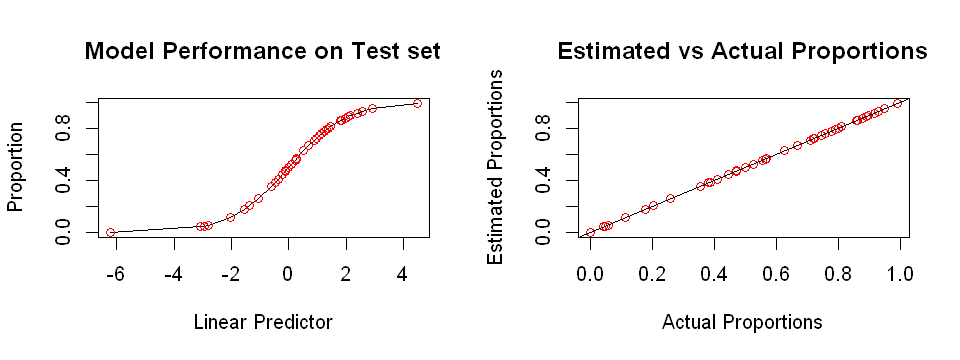

In [14]:
lp = predict(model2,test_set)
p_hat = predict(model2,test_set,"response")
lp_phat_df = data.frame(lp,p_hat)
lp_phat_df = lp_phat_df[order(lp),]

par(mfrow = c(1,2))
options(repr.plot.width=8, repr.plot.height=3)
plot(lp_phat_df$lp,lp_phat_df$p_hat,type = "l",xlab = "Linear Predictor",ylab = "Proportion",main = "Model Performance on Test set")
points(lp,test_set$p,col = "red")
plot(test_set$p,p_hat,col = "red",xlab = "Actual Proportions",ylab = "Estimated Proportions",main = "Estimated vs Actual Proportions")
abline(0,1)

The smooth line in the first plot represents the fitted model and the red points are the actual values. All the actual values are along the fitted curve indicating a perfect fit. The straight line in the second plot is a y=x line and all the points are along the line suggesting the estimated proportions are equal to actual proportions. Therefore, the above plots display the perfect accuracy of the model in predicting the proportions.

This concludes that the predictive performance of Regression model explicitly depends upon the estimated parameters.

In this project, we haven't considered error term during data simulation, which resulted in 100% accuracy of fitted models. However, this is impossible in real world problems and it is important not to overfit the data.